### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th><th>Key</th></tr>
<tr><td>survival</td><td> Survival </td><td>0 = No, 1 = Yes</td></tr>
<tr><td>pclass</td> <td>Ticket class</td><td>1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
<tr><td>name </td><td>Passenger Name	</td></tr>
<tr><td>sex </td><td>Sex 	</td></tr>
<tr><td>Age </td><td>Age in years 	</td></tr>
<tr><td>sibsp </td><td>Number of siblings / spouses aboard the Titanic</td></tr>
<tr><td>parch </td><td>Number of parents / children aboard the Titanic</td></tr>
<tr><td>ticket </td><td>Ticket number</td></tr>
<tr><td>fare </td><td>Passenger fare </td></tr>
<tr><td>cabin </td><td>Cabin number </td></tr>
<tr><td>embarked </td><td>Port of Embarkation</td><td> C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>

#### Titanic dataset Survival Classification

1) Read the dataset<br>
2) Remove/handle null values<br>
3) Depict Survived column count on a countplot<br>
4) Depict Survived column count based on Sex on a countplot<br>
5) Depict Survived column count based on Pclass on a countplot<br>
6) Depict quartile distribution of Age column for each of Pclass categories<br>
7) Encode categorical varibles if any<br>
8) Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable<br>
9) Split the dataset into training and testing data with test_size=25%<br>
10) Apply Logistic Regression and generate the predicted values for the test data<br>
11) Compute training and testing accuracy<br>
12) Generate confusion matrix. Also represnet it on heatmap<br>
13) Generate classifictaion_report<br>

In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 1. Read the dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 2. Remove/handle null values
df['Age'] = df.Age.fillna(df.Age.mean())
df['Cabin'] = df.Cabin.fillna('M20')
df['Embarked'] = df.Embarked.fillna('Q')

In [5]:
# Checking for missing values
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

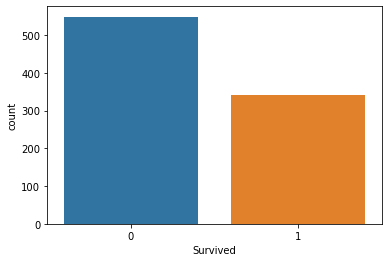

In [6]:
# 3. Depict Survived column count on a countplot
sns.countplot(x = df.Survived);

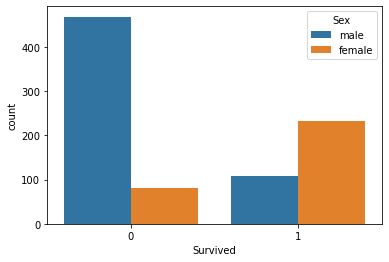

In [7]:
# 4. Depict Survived column count based on Sex on a countplot
sns.countplot(x=df.Survived, hue=df.Sex);

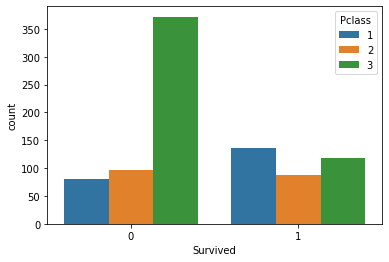

In [8]:
# 5. Depict Survived column count based on Pclass on a countplot
sns.countplot(x=df.Survived, hue=df.Pclass);

        count       mean        std   min    25%        50%        75%   max
Pclass                                                                      
1       216.0  37.048118  14.046369  0.92  29.00  35.000000  47.250000  80.0
2       184.0  29.866958  13.573825  0.67  23.00  29.699118  36.000000  70.0
3       491.0  26.403259  10.815245  0.42  20.25  29.699118  29.699118  74.0


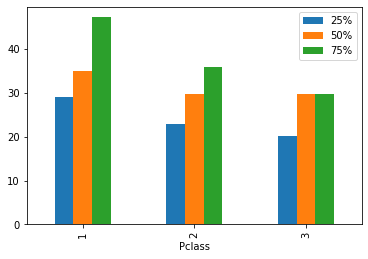

In [9]:
# 6. Depict quartile distribution of Age column for each of Pclass categories
print(df.groupby('Pclass')['Age'].describe())
df.groupby('Pclass')['Age'].describe()[["25%","50%","75%"]].plot.bar();

In [10]:
# 7. Encode categorical variables if any
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.Sex = lb.fit_transform(df['Sex'])
df.Embarked = lb.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,M20,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,M20,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,M20,2


In [11]:
# 8. Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable
X = df.drop(['Survived','Name','Ticket','Cabin'],axis=1)
y = df.Survived

In [12]:
# 9. Split the dataset into training and testing data with test_size=25%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [13]:
# 10. Apply Logistic Regression and generate the predicted values for the test data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# 11. Compute training and testing accuracy
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7934131736526946
0.8430493273542601


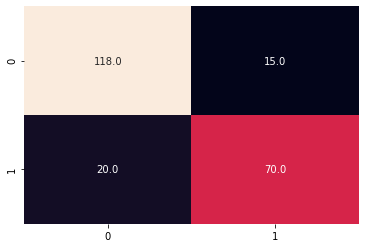

In [15]:
# 12. Generate confusion matrix. Also represent it on heatmap
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,
            annot=True,
            cbar=False,
            fmt=".1f");

In [16]:
# 13. Generate classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       133
           1       0.82      0.78      0.80        90

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.84       223
weighted avg       0.84      0.84      0.84       223

